In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Collection

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data Science/Datasets/Capstone Data.xlsx")
pat_details=pd.read_excel('/content/drive/MyDrive/Data Science/Datasets/patient_names.xlsx')

In [ ]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [ ]:
df['Patient Name']=pat_details['Patient Name']

In [ ]:
cols = ['Patient Name'] + [col for col in df if col != 'Patient Name']
df = df[cols]

In [ ]:
df.head(10)

,Patient Name,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,Sonya King,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,Lisa Castillo,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,Diane White,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,Erica Allen,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,Jennifer Park,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
5,Kimberly Smith,32.8,11.2,3.94,11.0,324,28.4,34.1,83.2,89,F,0
6,Richard Higgins,21.9,7.3,3.06,22.6,237,23.9,33.3,71.6,53,M,0
7,Christian Bowers,38.4,12.3,4.37,9.0,193,28.1,32.0,87.9,74,M,1
8,Rebecca Lynch,27.9,9.2,3.13,19.2,135,29.4,33.0,89.1,56,M,1
9,Lee Wang,38.2,12.9,4.53,11.7,452,28.5,33.8,84.3,66,M,1


In [ ]:
# Data Preprocessing

In [ ]:
df.isnull().sum()            # Validated regarding the missing/Null values in the dataset

,0
Patient Name,0
HAEMATOCRIT,0
HAEMOGLOBINS,0
ERYTHROCYTE,0
LEUCOCYTE,0
THROMBOCYTE,0
MCH,0
MCHC,0
MCV,0
AGE,0


In [ ]:
df.duplicated().sum()              # Validated regarding the Duplicated rows in the dataset

0

In [ ]:
df.describe                     # Inquired regarding the statistical properties of the numeric columns in the dataset

<bound method NDFrame.describe of         Patient Name  HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  \
0         Sonya King         33.8          11.1         4.18        4.6   
1      Lisa Castillo         44.6          14.0         6.86        6.3   
2        Diane White         42.9          14.0         4.57        6.2   
3        Erica Allen         41.9          14.4         4.67        3.5   
4      Jennifer Park         40.6          13.3         4.85       14.9   
...              ...          ...           ...          ...        ...   
3304  Joseph Johnson         39.0          13.2         4.45        4.0   
3305  Jeffrey Harvey         25.4           8.2         3.27        5.4   
3306  Tricia Collins         38.2          12.4         4.40        8.4   
3307    Linda Martin         43.4          15.2         5.29       10.1   
3308    Richard Hill         32.4          10.7         3.66        9.4   

      THROMBOCYTE   MCH  MCHC   MCV  AGE SEX  SOURCE  
0             150  26.6  32.8  80.9   33   F       1  
1             232  20.4  31.4  65.0   36   M       0  
2             336  30.6  32.6  93.9   70   F       0  
3             276  30.8  34.4  89.7   18   F       0  
4             711  27.4  32.8  83.7   36   M       0  
...           ...   ...   ...   ...  ...  ..     ...  
3304           50  29.7  33.8  87.6   45   M       1  
3305           90  25.1  32.3  77.7    1   F       1  
3306          328  28.2  32.5  86.8   64   M       0  
3307          326  28.7  35.0  82.0   33   M       0  
3308          214  29.2  33.0  88.5   72   F       1  

[3309 rows x 12 columns]>

In [ ]:
df.info                # Validated regarding the Data types of the columns of the dataset

<bound method DataFrame.info of         Patient Name  HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  \
0         Sonya King         33.8          11.1         4.18        4.6   
1      Lisa Castillo         44.6          14.0         6.86        6.3   
2        Diane White         42.9          14.0         4.57        6.2   
3        Erica Allen         41.9          14.4         4.67        3.5   
4      Jennifer Park         40.6          13.3         4.85       14.9   
...              ...          ...           ...          ...        ...   
3304  Joseph Johnson         39.0          13.2         4.45        4.0   
3305  Jeffrey Harvey         25.4           8.2         3.27        5.4   
3306  Tricia Collins         38.2          12.4         4.40        8.4   
3307    Linda Martin         43.4          15.2         5.29       10.1   
3308    Richard Hill         32.4          10.7         3.66        9.4   

      THROMBOCYTE   MCH  MCHC   MCV  AGE SEX  SOURCE  
0             150  26.6  32.8  80.9   33   F       1  
1             232  20.4  31.4  65.0   36   M       0  
2             336  30.6  32.6  93.9   70   F       0  
3             276  30.8  34.4  89.7   18   F       0  
4             711  27.4  32.8  83.7   36   M       0  
...           ...   ...   ...   ...  ...  ..     ...  
3304           50  29.7  33.8  87.6   45   M       1  
3305           90  25.1  32.3  77.7    1   F       1  
3306          328  28.2  32.5  86.8   64   M       0  
3307          326  28.7  35.0  82.0   33   M       0  
3308          214  29.2  33.0  88.5   72   F       1  

[3309 rows x 12 columns]>

In [ ]:
df.head()

,Patient Name,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,Sonya King,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,Lisa Castillo,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,Diane White,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,Erica Allen,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,Jennifer Park,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [ ]:
df.rename(columns={'SOURCE':'Treatment Recommendation'},inplace=True)             # Renamed the output column from SOURCE to Treatment Recommendation

In [ ]:
df.head()

,Patient Name,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,Treatment Recommendation
0,Sonya King,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,Lisa Castillo,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,Diane White,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,Erica Allen,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,Jennifer Park,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [ ]:
# EDA and Feature Engineering

In [ ]:
df['Treatment Recommendation'].replace({0:'Healthy',1:'Diseased'},inplace=True)     # Updated the output column so that can be user friendly to understand

<ipython-input-17-165abcc486f7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Treatment Recommendation'].replace({0:'Healthy',1:'Diseased'},inplace=True)     # Updated the output column so that can be user friendly to understand


In [ ]:
df['Treatment Recommendation'].head()

,Treatment Recommendation
0,Diseased
1,Healthy
2,Healthy
3,Healthy
4,Healthy


In [ ]:
# Patient Name

In [ ]:
df['Patient Name']

,Patient Name
0,Sonya King
1,Lisa Castillo
2,Diane White
3,Erica Allen
4,Jennifer Park
...,...
3304,Joseph Johnson
3305,Jeffrey Harvey
3306,Tricia Collins
3307,Linda Martin


In [ ]:
# HAEMATOCRIT

In [ ]:
df['HAEMATOCRIT'].value_counts()      # Data is going huge since there are decimal pointers in the column and it is going till 314 rows

,count
HAEMATOCRIT,
37.1,35
39.0,34
42.2,30
41.5,29
40.7,28
...,...
25.6,1
51.6,1
52.0,1


In [ ]:
df['HAEMATOCRIT'].value_counts().count()              # Total rows in the column HAEMATOCRIT are 314 which will make the model run slower

314

In [ ]:
df['HAEMATOCRIT']=round(df['HAEMATOCRIT'],0)           # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['HAEMATOCRIT'].value_counts()

,count
HAEMATOCRIT,
38.0,247
40.0,238
42.0,236
39.0,200
36.0,195
37.0,191
41.0,184
44.0,184
43.0,174


In [ ]:
df['HAEMATOCRIT'].value_counts().count()       # After rounding the data the rows are been reduced to 45 from 314

45

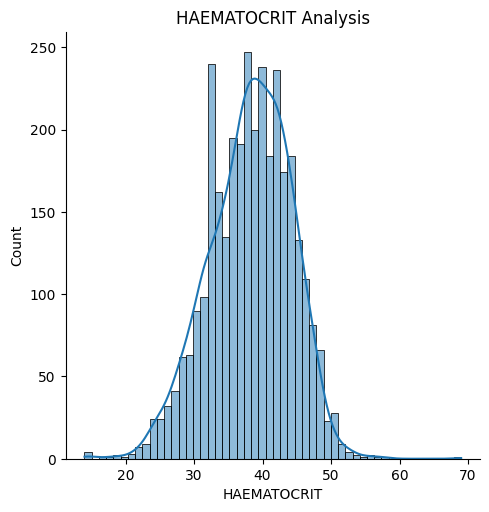

In [ ]:
sns.displot(x=df['HAEMATOCRIT'],kde=True)     # Univariate Analysis for HAEMATOCRIT
plt.title('HAEMATOCRIT Analysis')
plt.show()

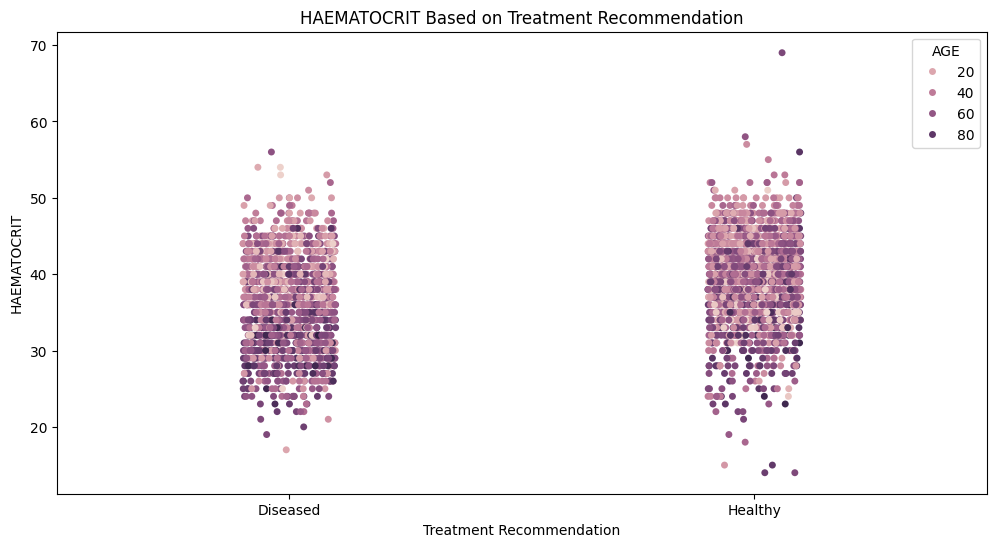

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for HAEMATOCRIT
sns.stripplot(x=df['Treatment Recommendation'], y=df['HAEMATOCRIT'], hue=df['AGE'], jitter=True)
plt.title('HAEMATOCRIT Based on Treatment Recommendation')
plt.show()

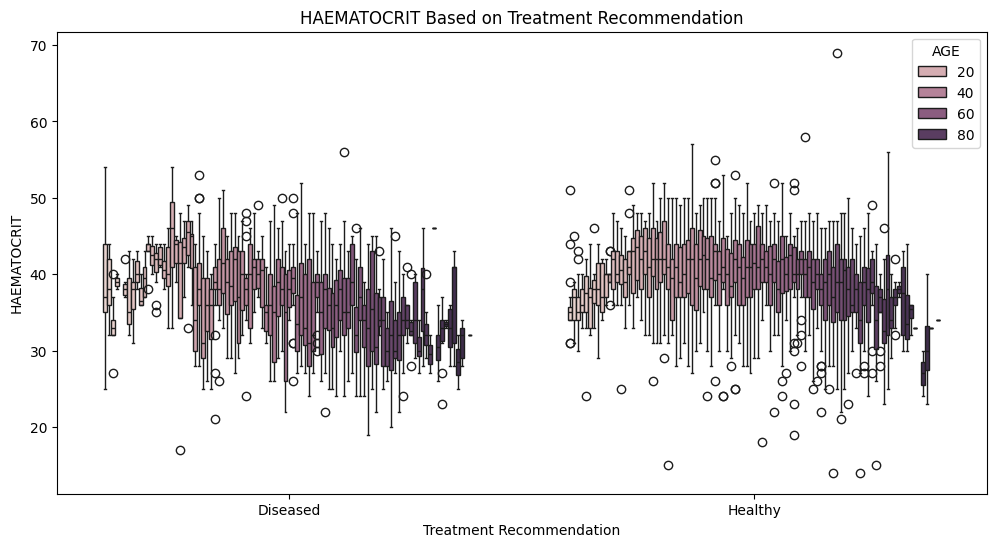

In [ ]:
plt.figure(figsize=(12, 6))                                    # Bivariate Analysis for HAEMATOCRIT
sns.boxplot(x=df['Treatment Recommendation'], y=df['HAEMATOCRIT'], hue=df['AGE'])
plt.title('HAEMATOCRIT Based on Treatment Recommendation')
plt.show()

In [ ]:
# HAEMOGLOBINS

In [ ]:
df['HAEMOGLOBINS'].value_counts()     # Data is going huge since there are decimal pointers in the column and it is going till 128 rows

,count
HAEMOGLOBINS,
13.4,78
14.0,75
13.5,69
12.8,67
14.4,66
...,...
6.7,1
18.1,1
6.2,1


In [ ]:
df['HAEMOGLOBINS'].value_counts().count()     # Total rows in the column HAEMATOCRIT are 128 which will make the model run slower

128

In [ ]:
df['HAEMOGLOBINS']=round(df['HAEMOGLOBINS'],0)     # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['HAEMOGLOBINS'].value_counts()                 # After rounding the data the rows are been reduced to 128 from 16

,count
HAEMOGLOBINS,
14.0,640
12.0,608
13.0,554
15.0,361
11.0,336
10.0,282
16.0,239
9.0,136
8.0,66


In [ ]:
df['HAEMOGLOBINS'].value_counts().count()     # After rounding the data the rows are been reduced to 128 from 16

16

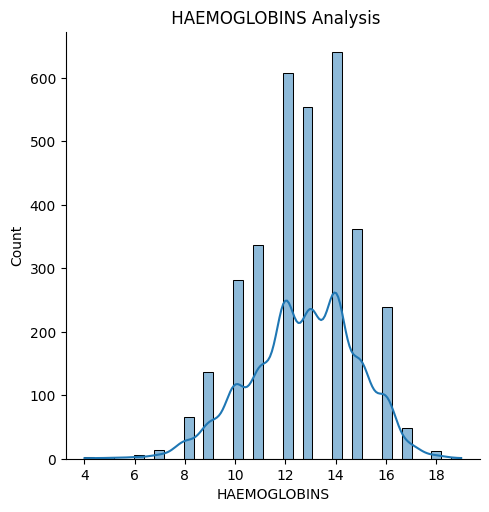

In [ ]:
sns.displot(df['HAEMOGLOBINS'],kde=True)       # Univariate Analysis for HAEMOGLOBINS
plt.title(' HAEMOGLOBINS Analysis')
plt.show()

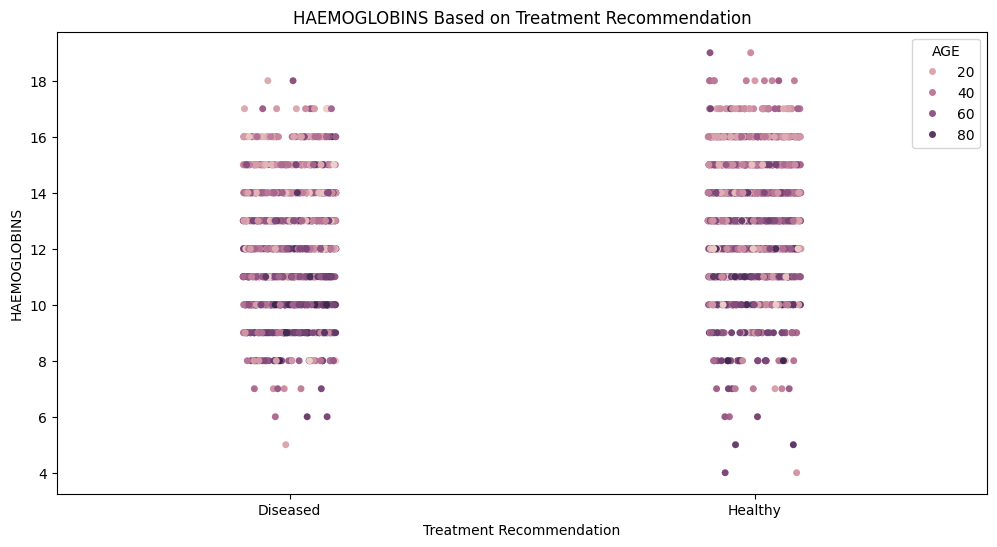

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for HAEMOGLOBINS
sns.stripplot(x=df['Treatment Recommendation'], y=df['HAEMOGLOBINS'], hue=df['AGE'], jitter=True)
plt.title('HAEMOGLOBINS Based on Treatment Recommendation')
plt.show()

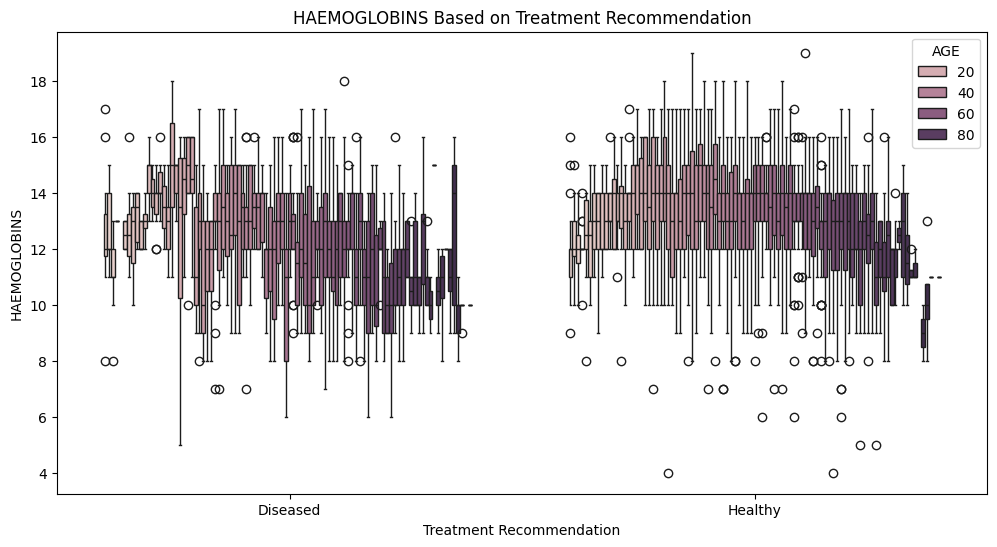

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for HAEMOGLOBINS
sns.boxplot(x=df['Treatment Recommendation'], y=df['HAEMOGLOBINS'], hue=df['AGE'])
plt.title('HAEMOGLOBINS Based on Treatment Recommendation')
plt.show()

In [ ]:
# ERYTHROCYTE

In [ ]:
df['ERYTHROCYTE'].value_counts()             # Data is going huge since there are decimal pointers in the column and it is going till 406 rows

,count
ERYTHROCYTE,
4.81,31
4.66,25
4.59,25
4.88,24
4.40,24
...,...
6.23,1
7.04,1
6.37,1


In [ ]:
df['ERYTHROCYTE'].value_counts().count()                  # Total rows in the column ERYTHROCYTE are 406 which will make the model run slower

406

In [ ]:
df['ERYTHROCYTE']=round(df['ERYTHROCYTE'],0)             # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['ERYTHROCYTE'].value_counts()                         # After rounding the data the rows are been reduced to 406 from 8

,count
ERYTHROCYTE,
5.0,1466
4.0,1204
3.0,299
6.0,288
7.0,32
2.0,14
8.0,5
1.0,1


In [ ]:
df['ERYTHROCYTE'].value_counts().count()                 # After rounding the data the rows are been reduced to 406 from 8

8

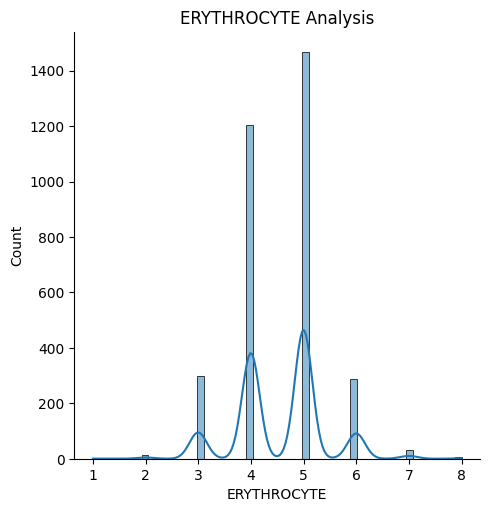

In [ ]:
sns.displot(df['ERYTHROCYTE'],kde=True)                   # Univariate Analysis for ERYTHROCYTE
plt.title('ERYTHROCYTE Analysis')
plt.show()

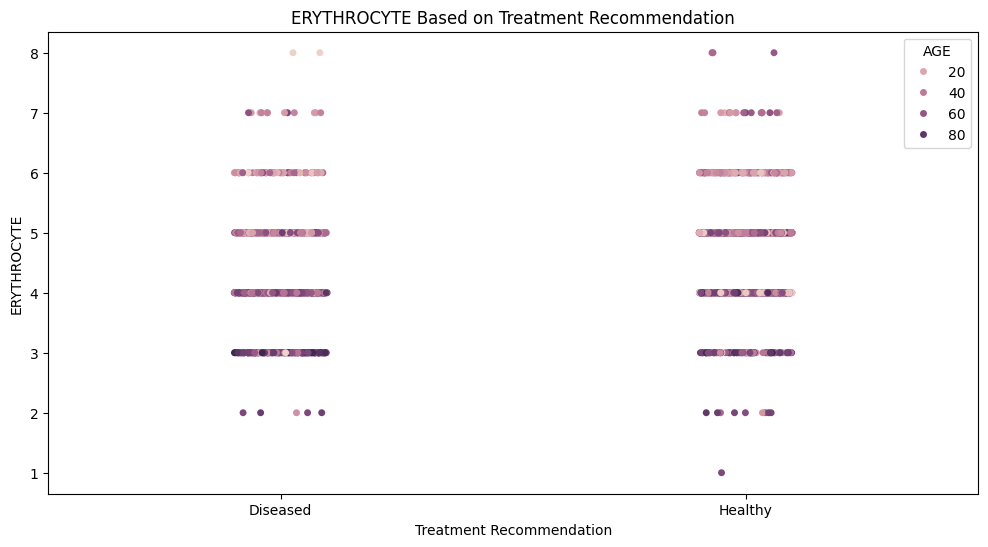

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for ERYTHROCYTE
sns.stripplot(x=df['Treatment Recommendation'], y=df['ERYTHROCYTE'], hue=df['AGE'], jitter=True)
plt.title('ERYTHROCYTE Based on Treatment Recommendation')
plt.show()

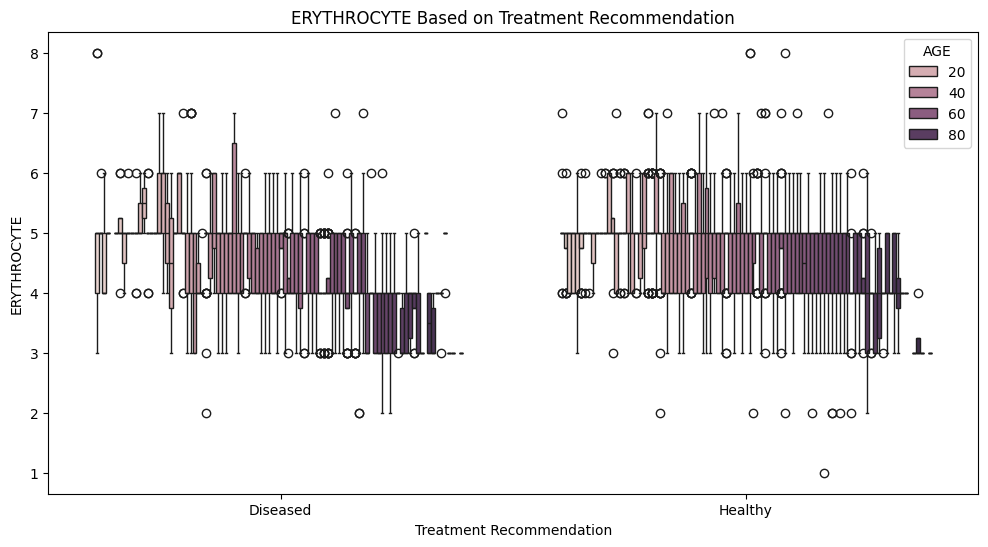

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for ERYTHROCYTE
sns.boxplot(x=df['Treatment Recommendation'], y=df['ERYTHROCYTE'], hue=df['AGE'])
plt.title('ERYTHROCYTE Based on Treatment Recommendation')
plt.show()

In [ ]:
# LEUCOCYTE

In [ ]:
df['LEUCOCYTE'].value_counts()            # Data is going huge since there are decimal pointers in the column and it is going till 255 rows

,count
LEUCOCYTE,
6.2,54
7.1,53
6.3,52
7.0,51
7.3,49
...,...
33.3,1
32.3,1
23.1,1


In [ ]:
df['LEUCOCYTE'].value_counts().count()                         # Total rows in the column LEUCOCYTE are 255 which will make the model run slower

255

In [ ]:
df['LEUCOCYTE']=round(df['LEUCOCYTE'],0)                    # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['LEUCOCYTE'].value_counts()                              # After rounding the data the rows are been reduced to 255 from 40

,count
LEUCOCYTE,
6.0,475
8.0,396
7.0,384
5.0,315
9.0,270
10.0,261
4.0,227
11.0,142
12.0,135


In [ ]:
df['LEUCOCYTE'].value_counts().count()                      # After rounding the data the rows are been reduced to 255 from 40

40

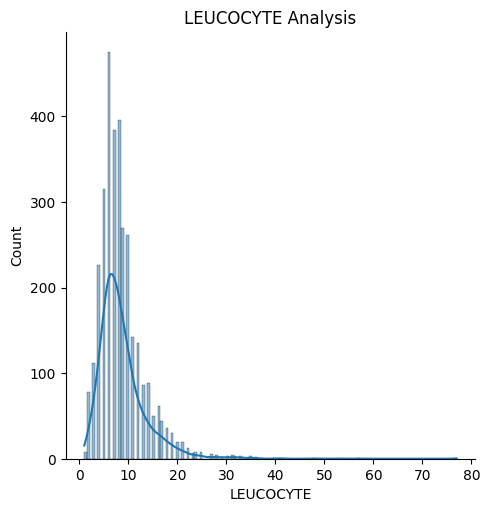

In [ ]:
sns.displot(df['LEUCOCYTE'],kde=True)                       # Univariate Analysis for LEUCOCYTE
plt.title('LEUCOCYTE Analysis')
plt.show()

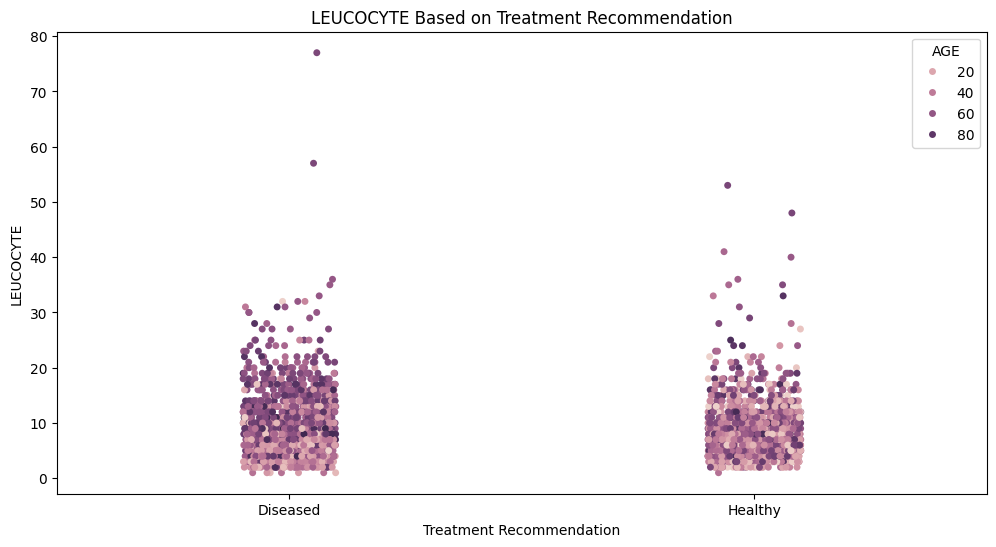

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for LEUCOCYTE
sns.stripplot(x=df['Treatment Recommendation'], y=df['LEUCOCYTE'], hue=df['AGE'], jitter=True)
plt.title('LEUCOCYTE Based on Treatment Recommendation')
plt.show()

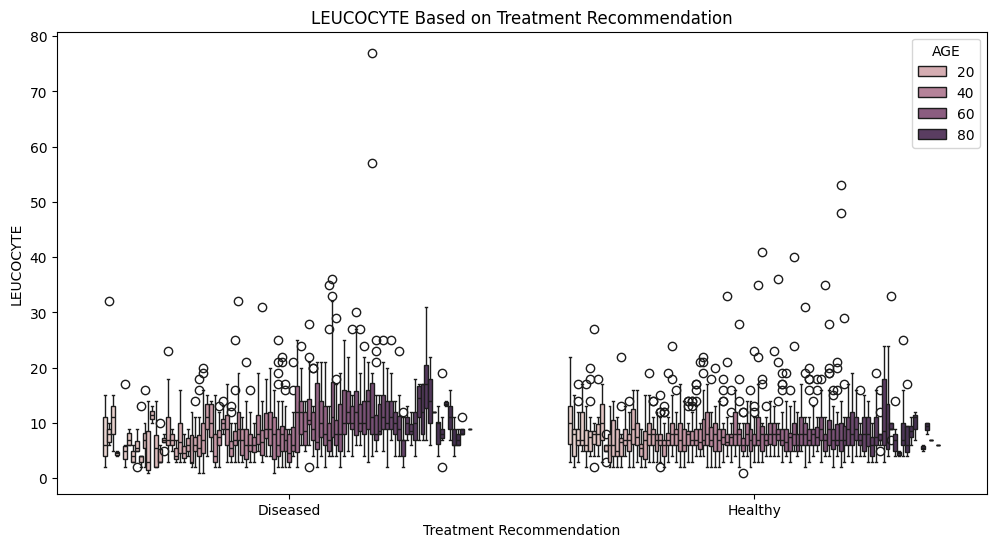

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for LEUCOCYTE
sns.boxplot(x=df['Treatment Recommendation'], y=df['LEUCOCYTE'], hue=df['AGE'])
plt.title('LEUCOCYTE Based on Treatment Recommendation')
plt.show()

In [ ]:
# THROMBOCYTE

In [ ]:
df['THROMBOCYTE'].value_counts()

,count
THROMBOCYTE,
150,46
284,26
299,22
236,22
265,22
...,...
47,1
38,1
617,1


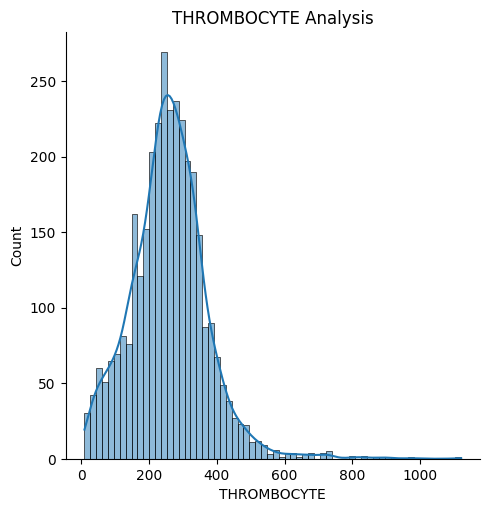

In [ ]:
sns.displot(x=df['THROMBOCYTE'],kde=True)             # Univariate Analysis for THROMBOCYTE
plt.title('THROMBOCYTE Analysis')
plt.show()

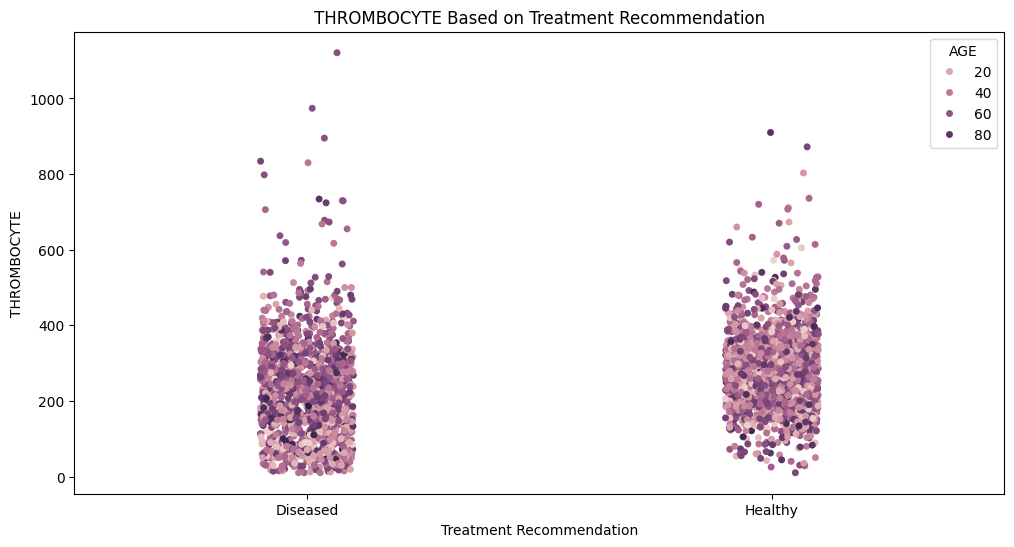

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for THROMBOCYTE
sns.stripplot(x=df['Treatment Recommendation'], y=df['THROMBOCYTE'], hue=df['AGE'], jitter=True)
plt.title('THROMBOCYTE Based on Treatment Recommendation')
plt.show()

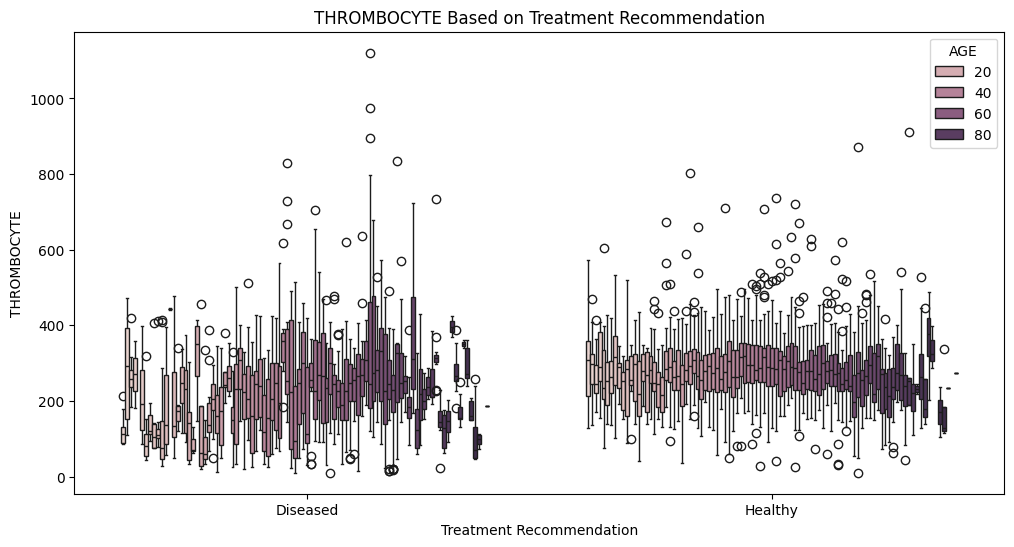

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for THROMBOCYTE
sns.boxplot(x=df['Treatment Recommendation'], y=df['THROMBOCYTE'], hue=df['AGE'])
plt.title('THROMBOCYTE Based on Treatment Recommendation')
plt.show()

In [ ]:
df.sample()

,Patient Name,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,Treatment Recommendation
1857,Jose Rodriguez,44.0,16.0,5.0,13.0,387,28.8,35.1,82.3,12,M,Diseased


In [ ]:
# MCH

In [ ]:
df['MCH'].value_counts()                    # Data is going huge since there are decimal pointers in the column and it is going till 177 rows

,count
MCH,
29.3,88
28.7,88
28.8,87
29.1,85
29.6,73
...,...
34.8,1
35.4,1
16.6,1


In [ ]:
df['MCH'].value_counts().count()                      # Total rows in the column LEUCOCYTE are 177 which will make the model run slower

177

In [ ]:
df['MCH']=round(df['MCH'],0)                         # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['MCH'].value_counts()                             # After rounding the data the rows are been reduced to 177 from 25

,count
MCH,
29.0,669
30.0,611
28.0,597
27.0,310
31.0,265
26.0,232
32.0,154
25.0,132
24.0,68


In [ ]:
df['MCH'].value_counts().count()                              # After rounding the data the rows are been reduced to 177 from 25

25

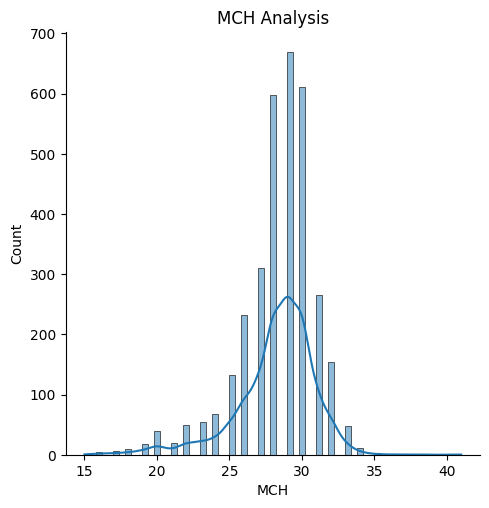

In [ ]:
sns.displot(x=df['MCH'],kde=True)                           # Univariate Analysis for MCH
plt.title('MCH Analysis')
plt.show()

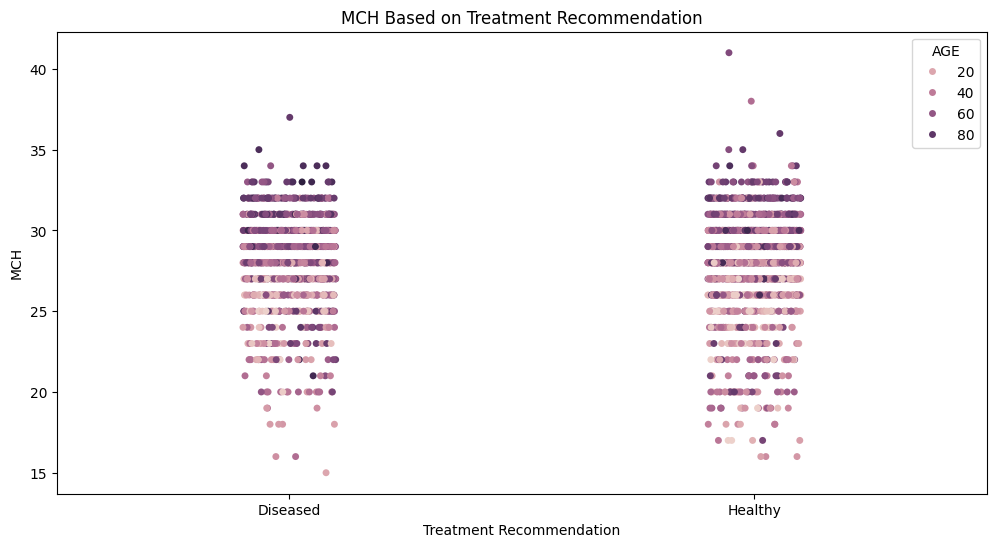

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCH
sns.stripplot(x=df['Treatment Recommendation'], y=df['MCH'], hue=df['AGE'], jitter=True)
plt.title('MCH Based on Treatment Recommendation')
plt.show()

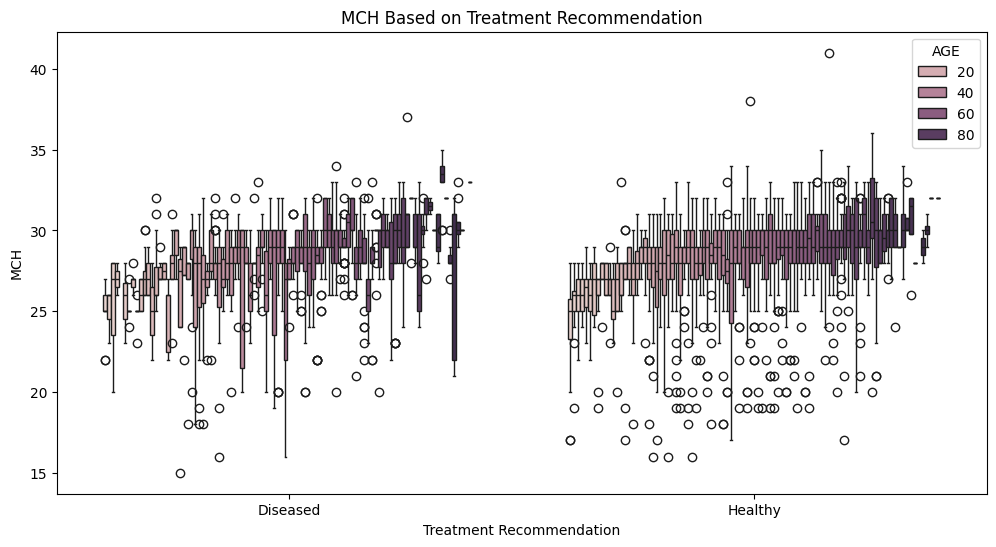

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCH
sns.boxplot(x=df['Treatment Recommendation'], y=df['MCH'], hue=df['AGE'])
plt.title('MCH Based on Treatment Recommendation')
plt.show()

In [ ]:
# MCHC

In [ ]:
df['MCHC'].value_counts()

,count
MCHC,
33.3,150
33.2,139
33.0,131
33.5,128
33.1,123
...,...
38.1,1
37.4,1
29.5,1


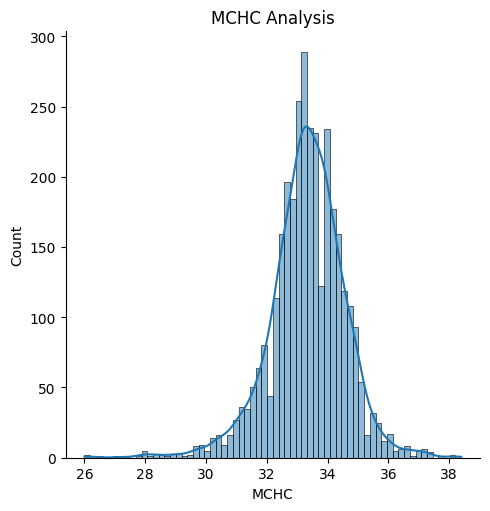

In [ ]:
sns.displot(x=df['MCHC'],kde=True)                       # Univariate Analysis for MCHC
plt.title('MCHC Analysis')
plt.show()

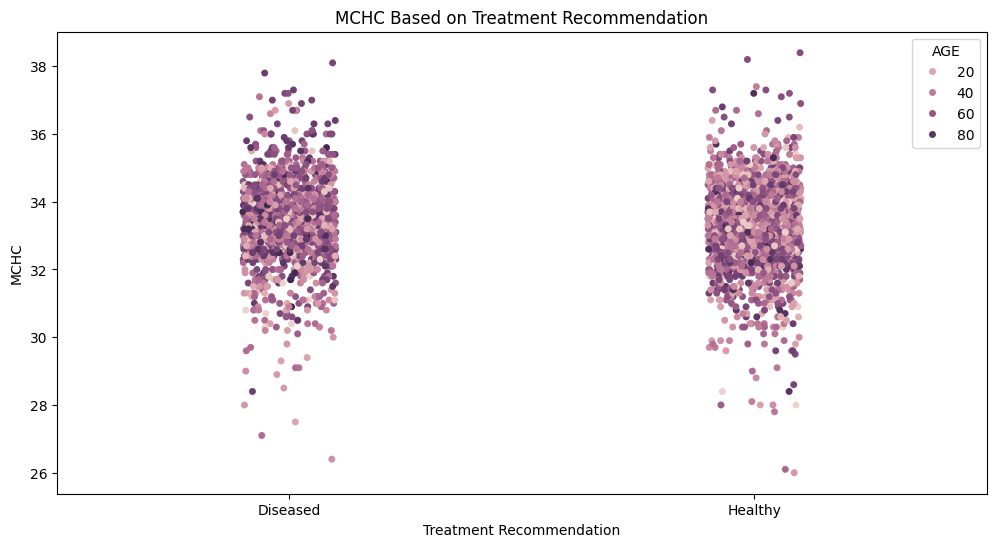

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCHC
sns.stripplot(x=df['Treatment Recommendation'], y=df['MCHC'], hue=df['AGE'], jitter=True)
plt.title('MCHC Based on Treatment Recommendation')
plt.show()

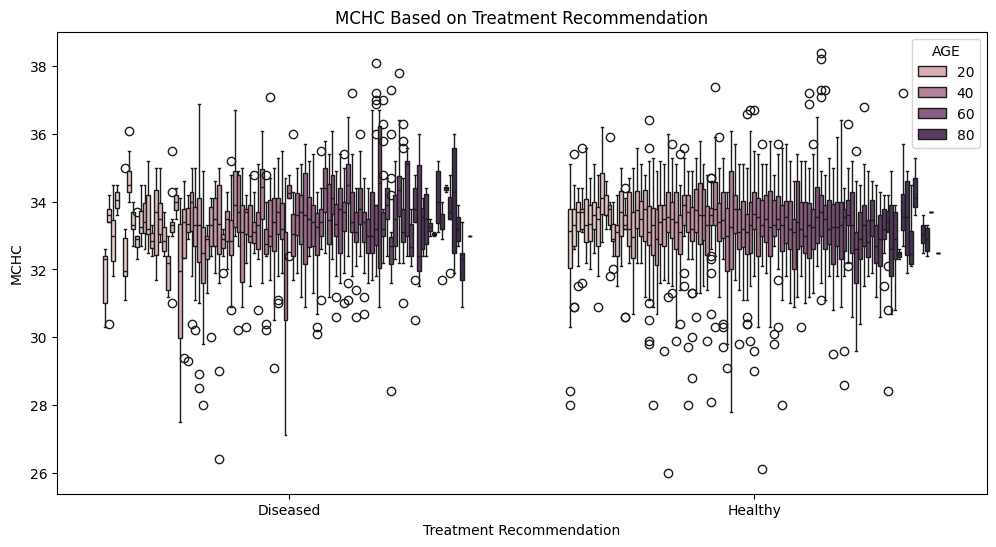

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCHC
sns.boxplot(x=df['Treatment Recommendation'], y=df['MCHC'], hue=df['AGE'])
plt.title('MCHC Based on Treatment Recommendation')
plt.show()

In [ ]:
# MCV

In [ ]:
df['MCV'].value_counts()                           # Data is going huge since there are decimal pointers in the column and it is going till 390 rows

,count
MCV,
86.6,35
87.6,34
85.1,33
85.3,32
85.4,31
...,...
96.3,1
54.0,1
67.4,1


In [ ]:
df['MCV'].value_counts().count()                        # Total rows in the column MCV are 390 which will make the model run slower

390

In [ ]:
df['MCV']=round(df['MCV'],0)                         # Rounded the column to reduce the rows so that the model can work faster and accurately

In [ ]:
df['MCV'].value_counts()                            # After rounding the data the rows are been reduced to 390 from 52

,count
MCV,
86.0,271
88.0,246
85.0,244
84.0,238
87.0,238
82.0,197
83.0,190
90.0,181
89.0,170


In [ ]:
df['MCV'].value_counts().count()                          # After rounding the data the rows are been reduced to 390 from 52

52

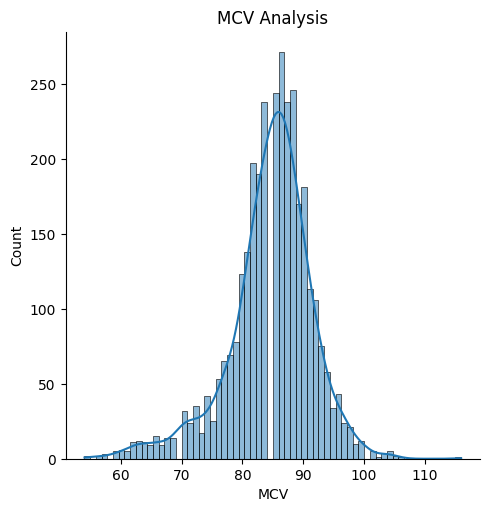

In [ ]:
sns.displot(x=df['MCV'],kde=True)                    # Univariate Analysis for MCV
plt.title('MCV Analysis')
plt.show()

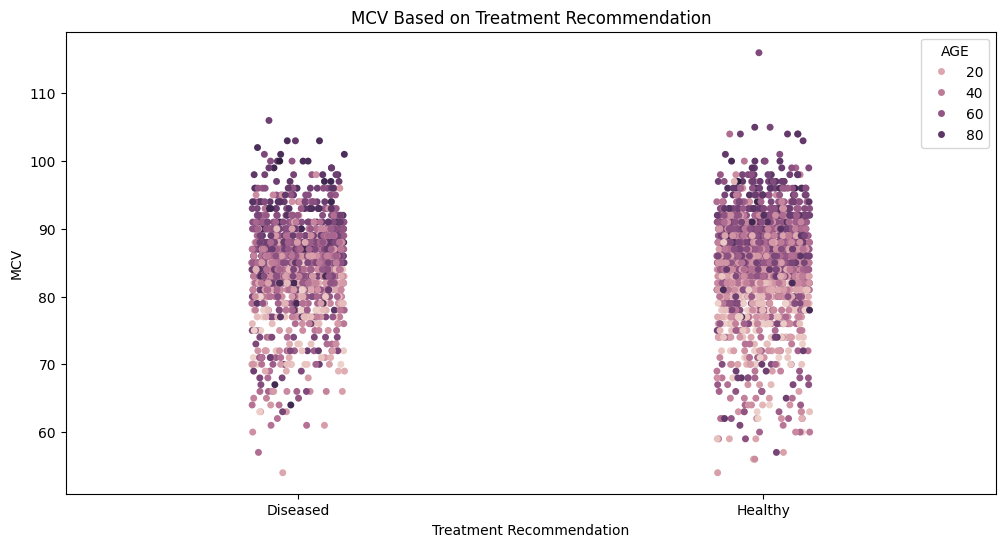

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCV
sns.stripplot(x=df['Treatment Recommendation'], y=df['MCV'], hue=df['AGE'], jitter=True)
plt.title('MCV Based on Treatment Recommendation')
plt.show()

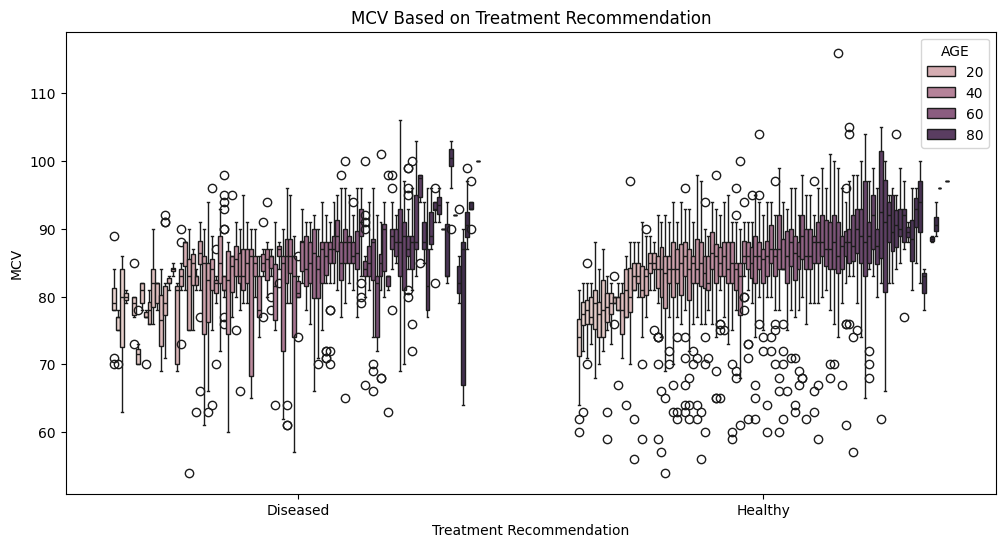

In [ ]:
plt.figure(figsize=(12, 6))                                       # Bivariate Analysis for MCV
sns.boxplot(x=df['Treatment Recommendation'], y=df['MCV'], hue=df['AGE'])
plt.title('MCV Based on Treatment Recommendation')
plt.show()

In [ ]:
# AGE

In [ ]:
df['AGE']

,AGE
0,33
1,36
2,70
3,18
4,36
...,...
3304,45
3305,1
3306,64
3307,33


In [ ]:
df['AGE'].value_counts()

,count
AGE,
25,67
67,66
62,65
45,63
33,60
...,...
90,5
85,4
99,1


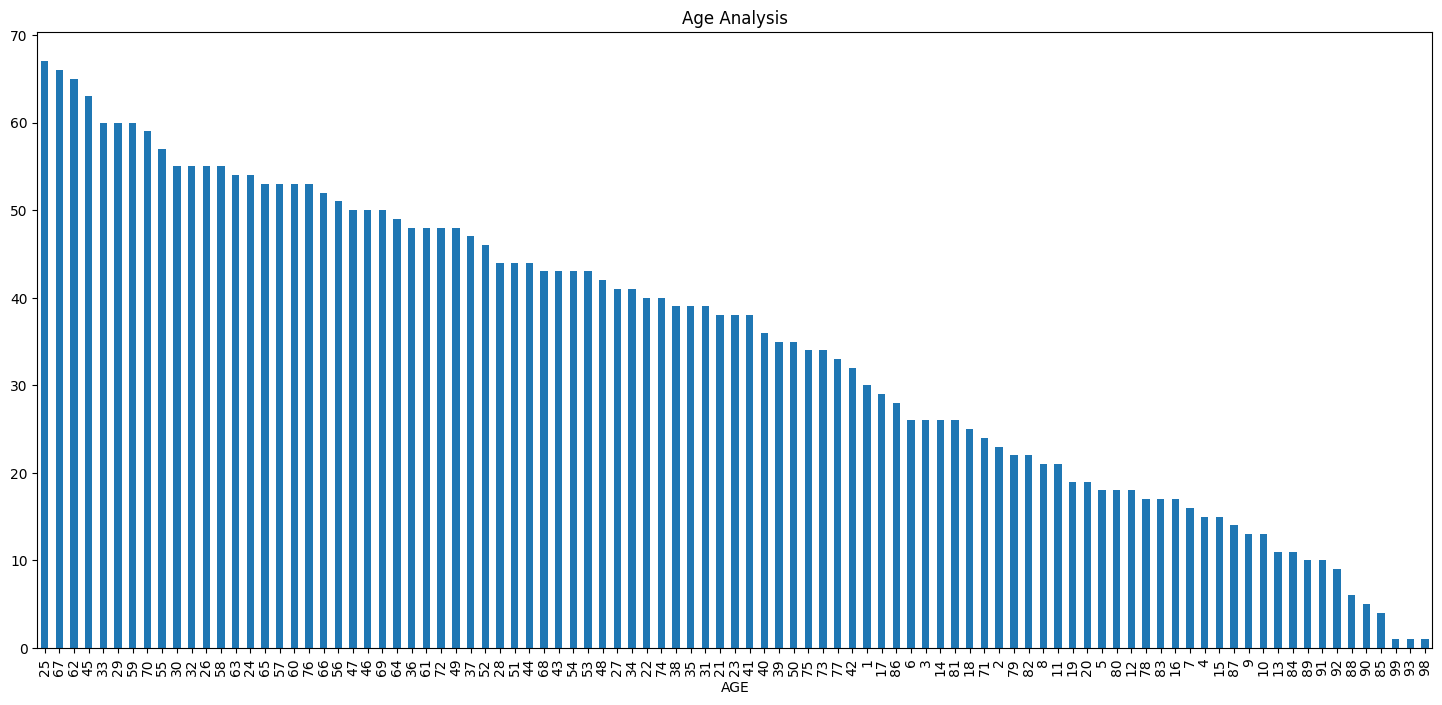

In [ ]:
plt.figure(figsize=(18,8))                          # Univariate Analysis for Age Category
df['AGE'].value_counts().plot(kind='bar')
plt.title('Age Analysis')
plt.show()

<Figure size 1000x600 with 0 Axes>

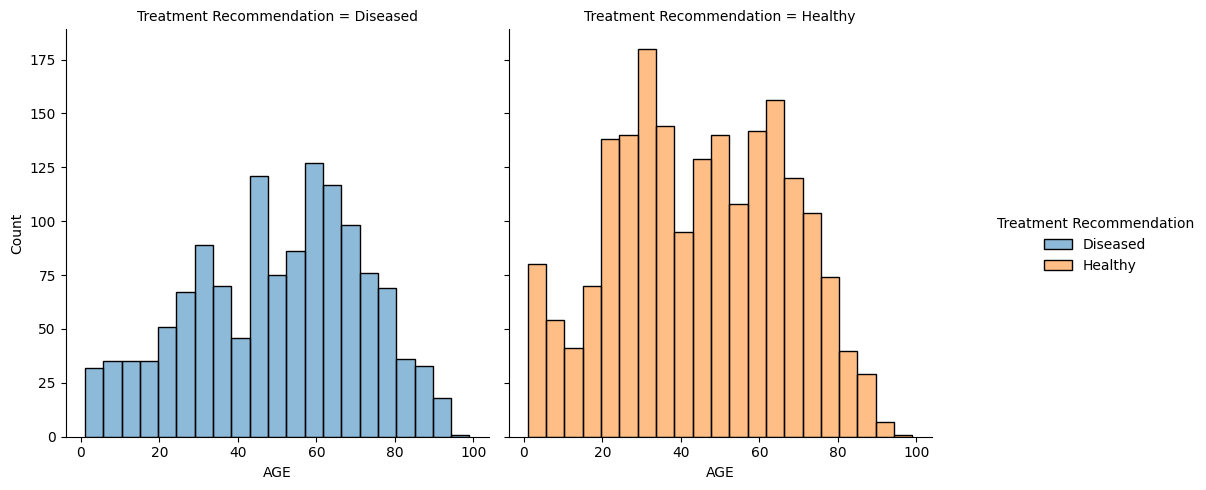

In [ ]:
plt.figure(figsize=(10, 6))                            # Treatment Recommendation wise classification of Patient's Age
sns.displot(data=df, x='AGE', hue='Treatment Recommendation', facet_kws=dict(margin_titles=True), col='Treatment Recommendation')
plt.show()

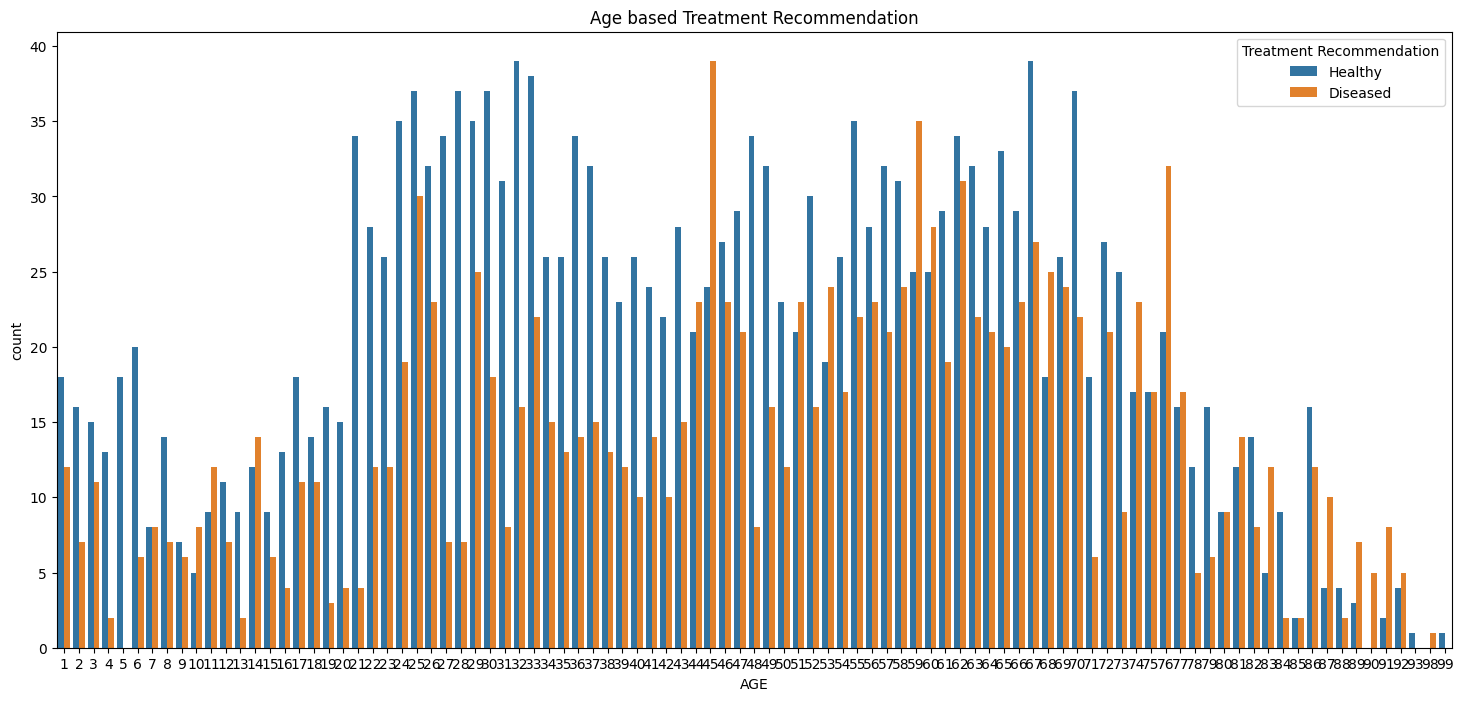

In [ ]:
plt.figure(figsize=(18,8))                                # Bivariate Analysis for Age Category
sns.countplot(x=df['AGE'],hue=df['Treatment Recommendation'])
plt.title('Age based Treatment Recommendation')
plt.show()

In [ ]:
# SEX

In [ ]:
df['SEX'].value_counts()

,count
SEX,
M,1743
F,1566


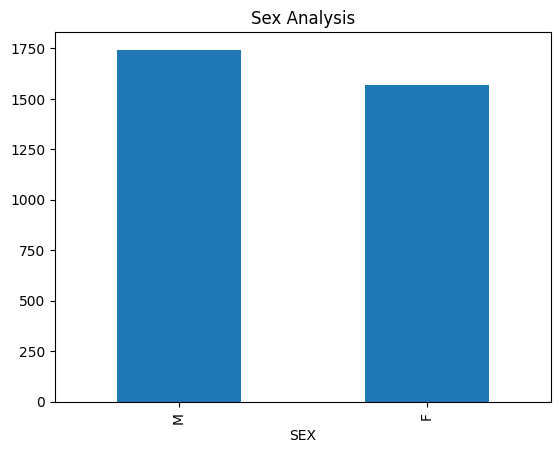

In [ ]:
df['SEX'].value_counts().plot(kind='bar')             # Univariate Analysis for Sex Category
plt.title('Sex Analysis')
plt.show()

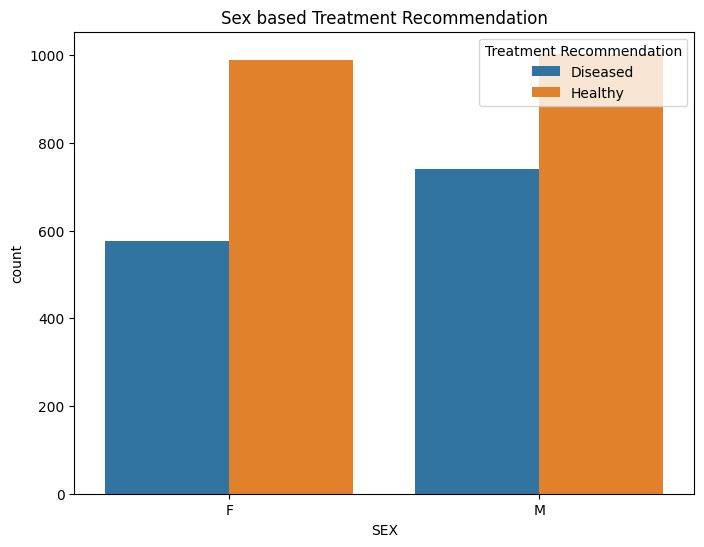

In [ ]:
plt.figure(figsize=(8,6))                                     # Bivariate Analysis for Sex Category
sns.countplot(x=df['SEX'],hue=df['Treatment Recommendation'])
plt.title('Sex based Treatment Recommendation')
plt.show()

<Figure size 600x600 with 0 Axes>

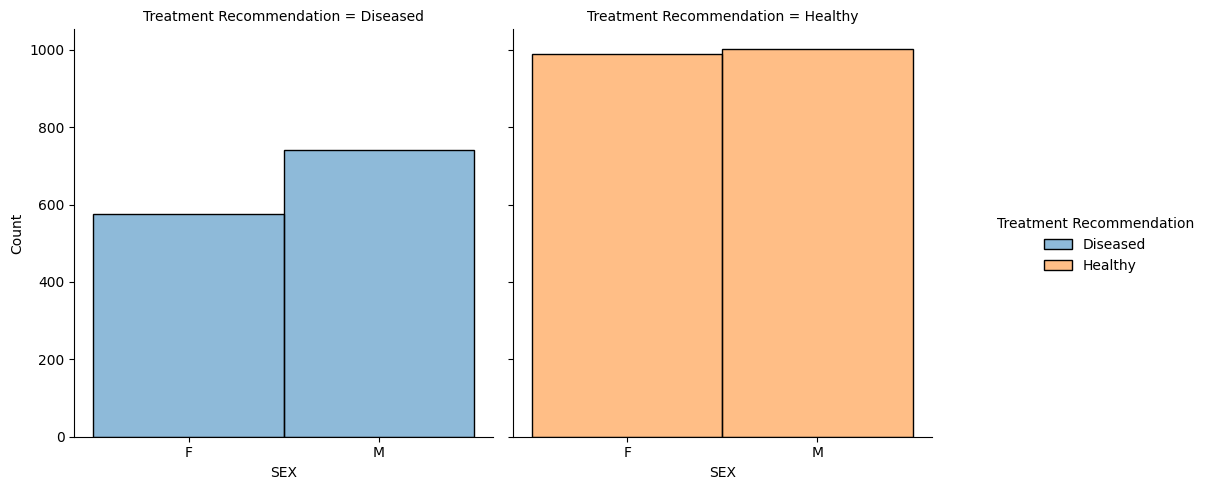

In [ ]:
plt.figure(figsize=(6, 6))                             # Display the distribution of Male and Female based on Treatment Recommendation
sns.displot(data=df, x='SEX', hue='Treatment Recommendation', facet_kws=dict(margin_titles=True), col='Treatment Recommendation')
plt.show()

In [ ]:
df.sample(10)

,Patient Name,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,Treatment Recommendation
3208,Leah Pham,30.0,10.0,3.0,19.0,490,28.0,33.1,85.0,69,F,Diseased
1184,Jessica Moon,47.0,16.0,5.0,10.0,201,33.0,33.1,99.0,52,M,Healthy
2240,Jimmy Lynn,50.0,17.0,6.0,9.0,35,27.0,33.2,82.0,18,M,Diseased
3159,Lee Cross,37.0,12.0,4.0,12.0,469,29.0,32.4,90.0,55,F,Diseased
2229,Sherri Cobb,30.0,10.0,4.0,17.0,150,28.0,32.9,85.0,69,M,Diseased
1335,Christopher Lawrence,33.0,10.0,4.0,7.0,387,23.0,30.9,75.0,2,F,Healthy
780,Sergio Young DDS,39.0,14.0,5.0,8.0,205,27.0,35.1,78.0,7,M,Healthy
82,Andrea Wilson,38.0,13.0,5.0,5.0,295,27.0,33.9,81.0,66,M,Healthy
2447,Gina White,23.0,8.0,3.0,14.0,153,32.0,36.4,87.0,76,M,Diseased
3229,Michael Wood,37.0,13.0,5.0,8.0,245,28.0,34.0,81.0,35,F,Diseased


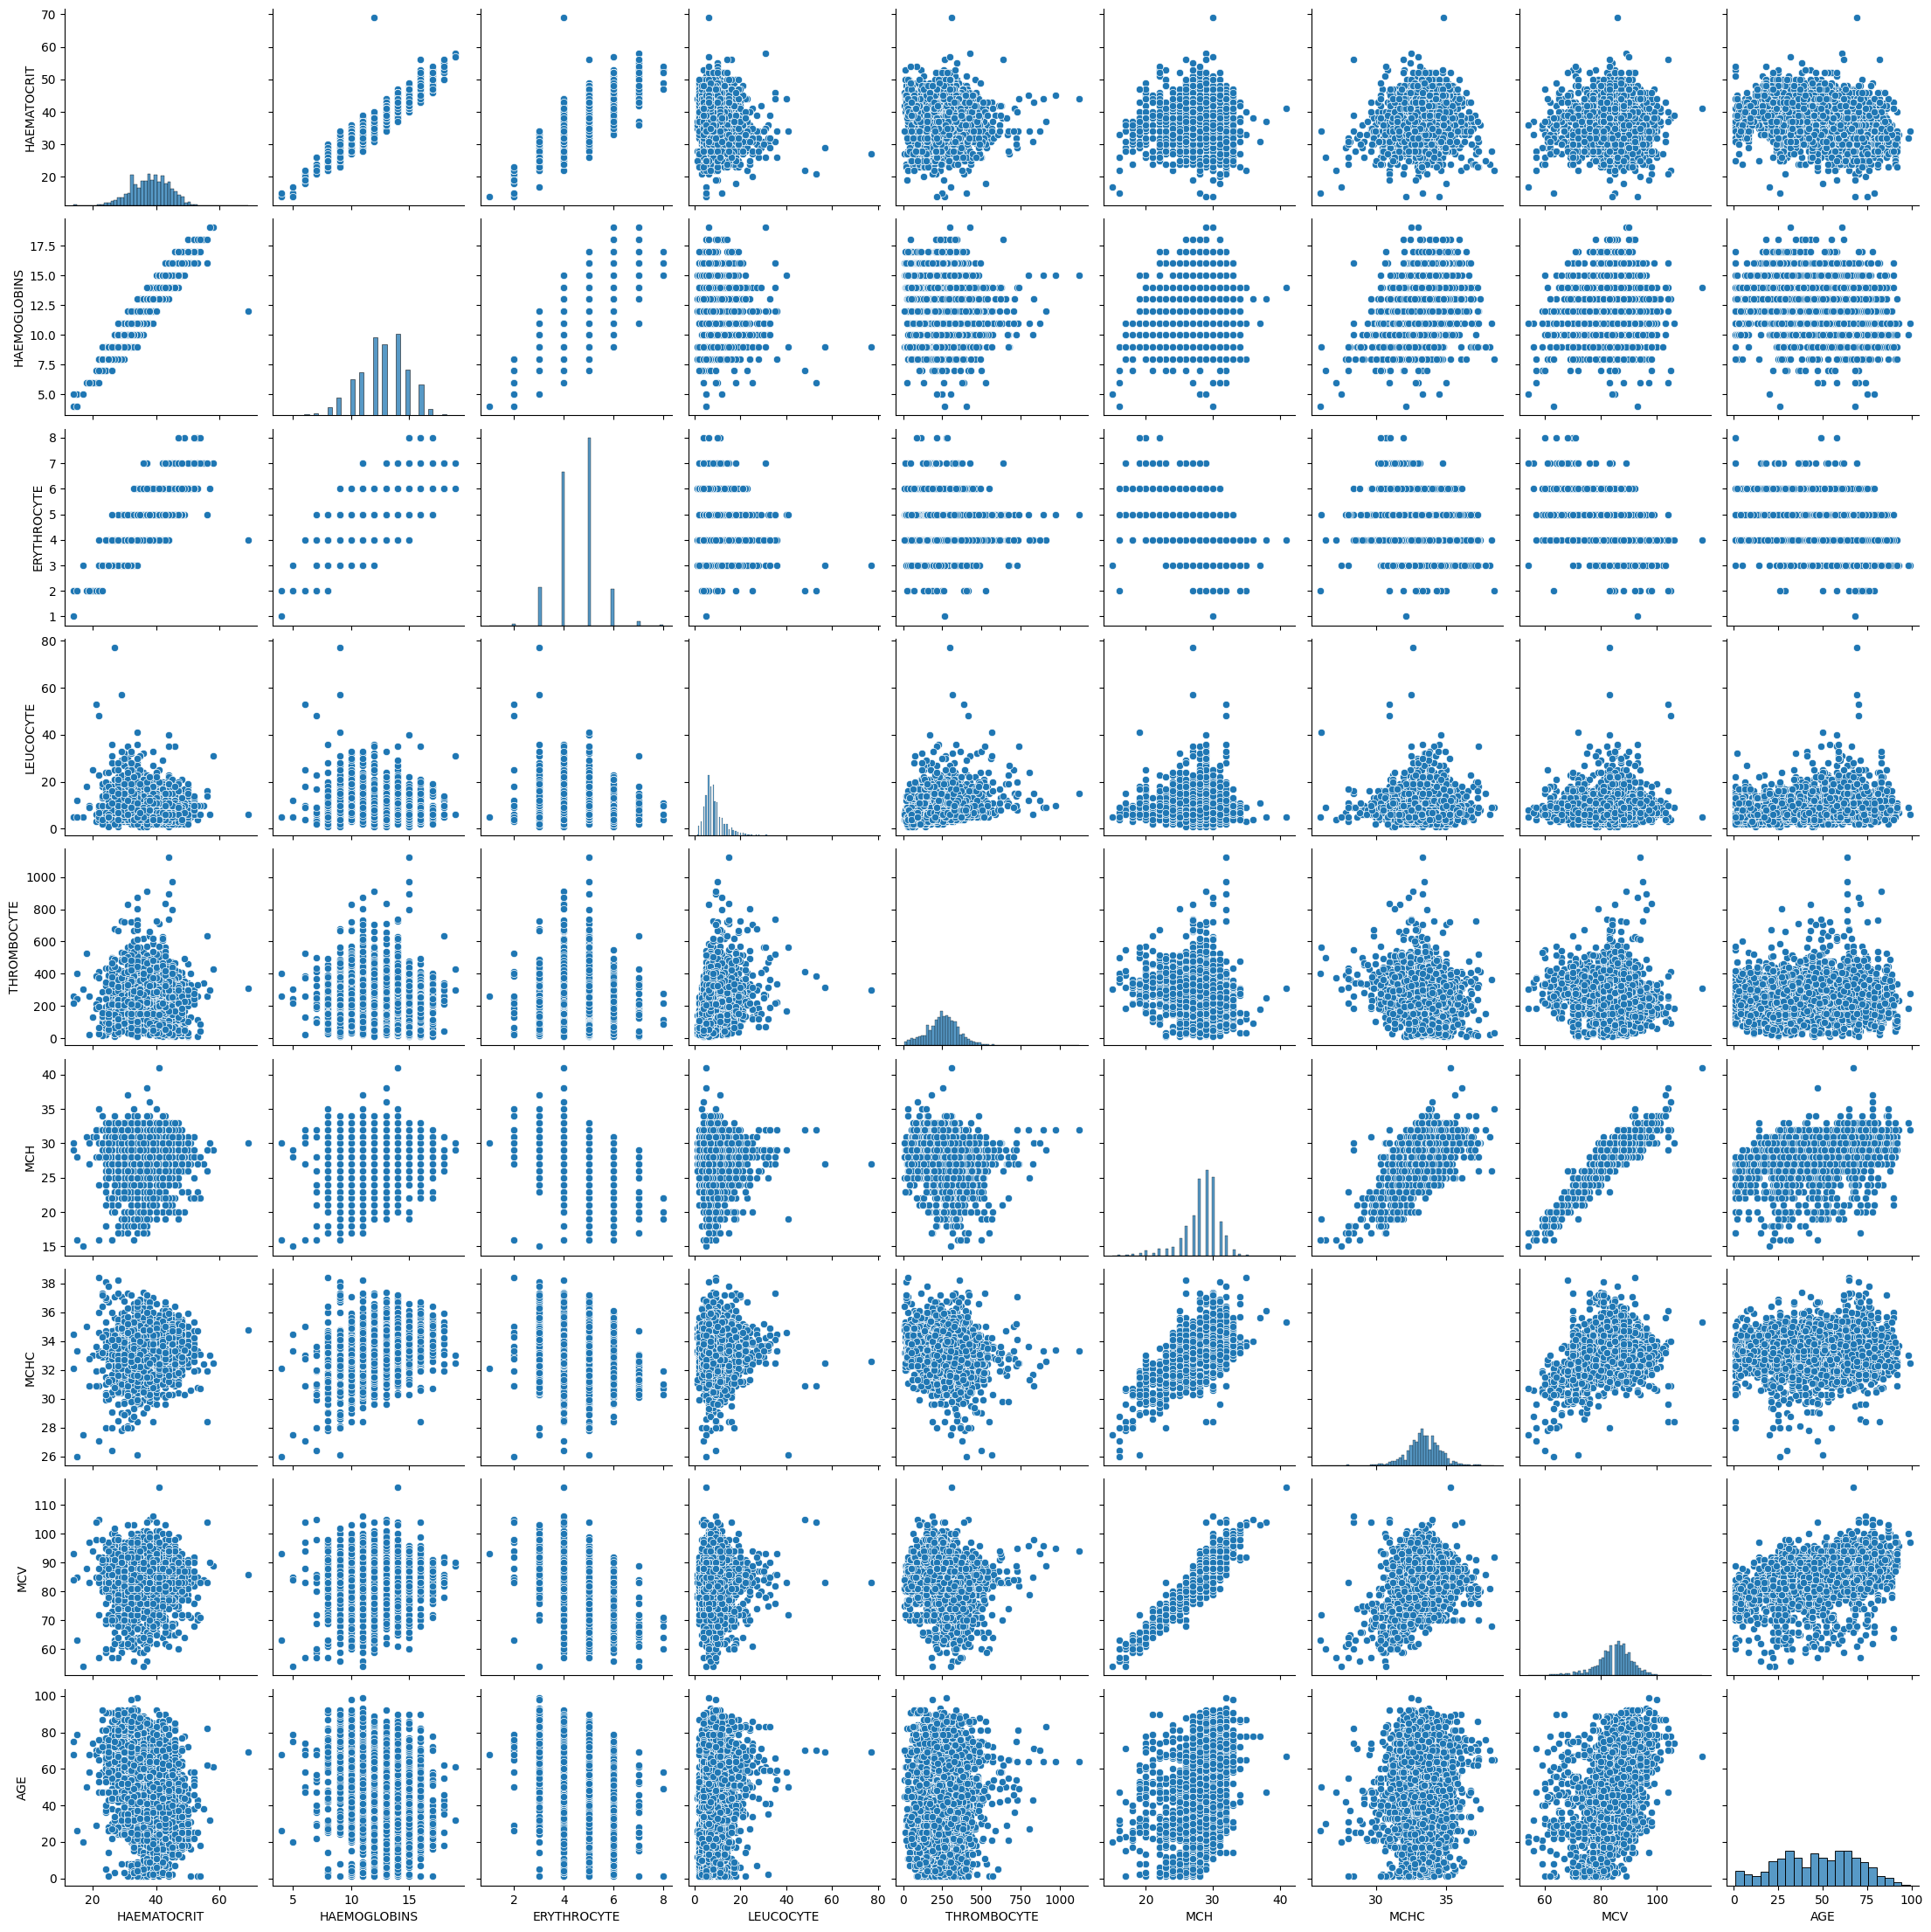

In [ ]:
sns.pairplot(df)             # Pair plotting
plt.show()

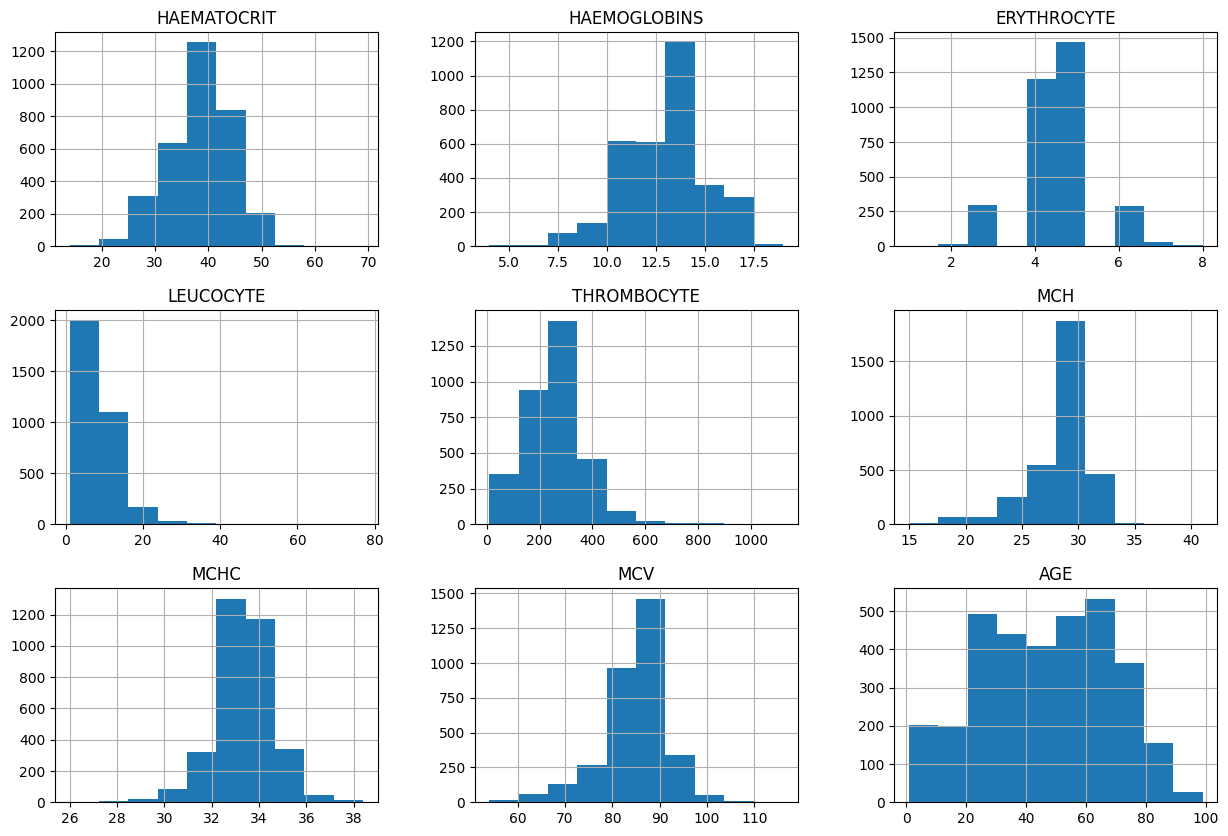

In [ ]:
df.hist(figsize=(15, 10))      # Histplot of the dataset
plt.show()

In [ ]:
# Model Development

In [ ]:
X=df.drop(columns=['Treatment Recommendation','Patient Name','SEX'])
y=df['Treatment Recommendation']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Treatment Recommendation']=le.fit_transform(df['Treatment Recommendation'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=7)

In [ ]:
X_train.shape

(2911, 9)

In [ ]:
X_test.shape

(398, 9)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# Treatment Recommendations

In [ ]:
df.corr(numeric_only=True)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,Treatment Recommendation
HAEMATOCRIT,1.000000,0.960681,0.799951,-0.212739,-0.006000,0.092174,0.125765,0.057799,-0.256457,0.272415
HAEMOGLOBINS,0.960681,1.000000,0.748337,-0.200191,-0.042568,0.209556,0.330748,0.106408,-0.238101,0.254696
ERYTHROCYTE,0.799951,0.748337,1.000000,-0.165216,0.021807,-0.365312,-0.044551,-0.418974,-0.390118,0.216983
LEUCOCYTE,-0.212739,-0.200191,-0.165216,1.000000,0.280832,-0.009694,0.009803,-0.013333,0.189235,-0.138022
THROMBOCYTE,-0.006000,-0.042568,0.021807,0.280832,1.000000,-0.132013,-0.188588,-0.076690,0.024690,0.229550
MCH,0.092174,0.209556,-0.365312,-0.009694,-0.132013,1.000000,0.590875,0.925002,0.358990,0.002787
MCHC,0.125765,0.330748,-0.044551,0.009803,-0.188588,0.590875,1.000000,0.263410,0.048137,-0.026026
MCV,0.057799,0.106408,-0.418974,-0.013333,-0.076690,0.925002,0.263410,1.000000,0.404868,0.013427
AGE,-0.256457,-0.238101,-0.390118,0.189235,0.024690,0.358990,0.048137,0.404868,1.000000,-0.113494
Treatment Recommendation,0.272415,0.254696,0.216983,-0.138022,0.229550,0.002787,-0.026026,0.013427,-0.113494,1.000000


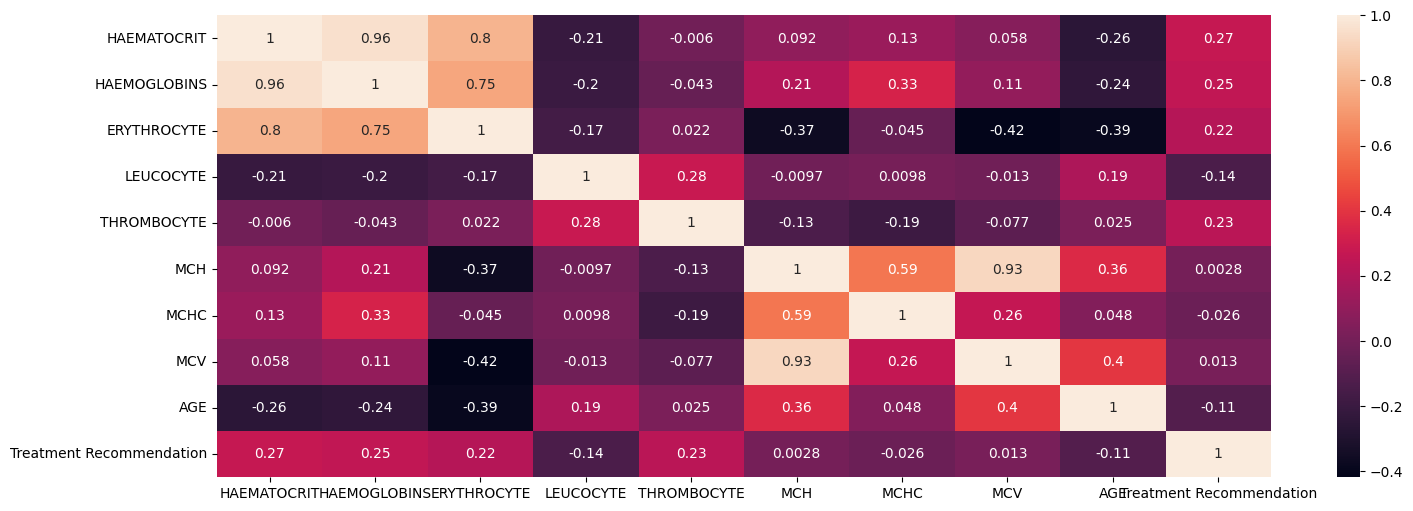

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report
import pandas as pd

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)


print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 2), '\n')
print('f1_score: ', round(f1_score(y_test, y_pred, pos_label='Healthy'), 2), '\n')
print('recall_score: ', round(recall_score(y_test, y_pred, pos_label='Healthy'), 2), '\n')
print('precision_score: ', round(precision_score(y_test, y_pred, pos_label='Healthy'), 2), '\n')
print('Classification_report: \n', classification_report(y_test, y_pred), '\n')
print('Confusion matrix: \n', pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy Score:  0.78 

f1_score:  0.83 

recall_score:  0.89 

precision_score:  0.78 

Classification_report: 
               precision    recall  f1-score   support

    Diseased       0.78      0.62      0.69       157
     Healthy       0.78      0.89      0.83       241

    accuracy                           0.78       398
   macro avg       0.78      0.75      0.76       398
weighted avg       0.78      0.78      0.78       398
 

Confusion matrix: 
     0    1
0  97   60
1  27  214


In [ ]:
rf_clf.classes_

array(['Diseased', 'Healthy'], dtype=object)

In [ ]:
# Model Interpretability

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_clf,open('rf_clf.pkl','wb'))

In [ ]:
! pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import pickle
import streamlit as st

df=pickle.load(open('df.pkl','rb'))
clf=pickle.load(open('rf_clf.pkl','rb'))

label_map= {'Diseased':'Diseased','Healthy':'Healthy'}

st.header("DocAssist")
st.subheader('Building Intelligent Medical Decision Support System')
st.divider()

HAEMATOCRIT=st.slider("Enter the Haematocrit of the person",min_value=10,max_value=80,value=0,step=1)
HAEMOGLOBINS=st.slider("Enter the Haemoglobins of the person",min_value=1,max_value=40,value=0,step=1)
ERYTHROCYTE=st.slider("Enter the Erythrocyte of the person",min_value=1,max_value=40,value=0,step=1)
LEUCOCYTE=st.slider("Enter the Leucocyte of the person",min_value=1,max_value=90,value=0,step=1)
THROMBOCYTE=st.number_input("Enter the Leucocyte of the person", min_value=None, max_value=None)
MCH=st.slider("Enter the MCH of the person",min_value=1,max_value=60,value=0,step=1)
MCHC=st.slider("Enter the MCHC of the person",min_value=1,max_value=60,value=0,step=1)
MCV=st.number_input("Enter the MCV of the person", min_value=None, max_value=None)
AGE=st.number_input("Enter the Age of the person", min_value=None, max_value=None,step=1)

if st.button("PREDICT"):
    op=clf.predict([[HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE]])
    op_str = op[0]
    st.subheader(f"Considering the symptoms the person is {op_str}")

Writing app.py


In [ ]:
# User Interface

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.85.160:8501

⠧⠇⠏⠋⠙⠹Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://smooth-clowns-love.loca.lt
  Stopping...
^C


In [ ]:
# Implementing multiple Modelling algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)

# Fitting the models
rf_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Predicting using each model
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)

# Evaluating the accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print out the accuracy scores
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", svm_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.7532729103726082
Logistic Regression Accuracy: 0.7089627391742196
SVM Accuracy: 0.6998992950654582


In [ ]:
# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_clf, X, y, cv=5)
lr_scores = cross_val_score(lr_clf, X, y, cv=5)
svm_scores = cross_val_score(svm_clf, X, y, cv=5)

print("Random Forest CV scores:", rf_scores)
print("Logistic Regression CV scores:", lr_scores)
print("SVM CV scores:", svm_scores)

rf_cv_mean = rf_scores.mean()
lr_cv_mean = lr_scores.mean()
svm_cv_mean = svm_scores.mean()

# Printing the output
print("Random Forest Mean CV Accuracy:", rf_cv_mean)
print("Logistic Regression Mean CV Accuracy:", lr_cv_mean)
print("SVM Mean CV Accuracy:", svm_cv_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest CV scores: [0.74018127 0.74471299 0.74622356 0.74924471 0.75642965]
Logistic Regression CV scores: [0.69033233 0.72205438 0.69939577 0.71299094 0.71558245]
SVM CV scores: [0.68126888 0.70543807 0.70694864 0.69033233 0.72919818]
Random Forest Mean CV Accuracy: 0.747358437961342
Logistic Regression Mean CV Accuracy: 0.7080711729458706
SVM Mean CV Accuracy: 0.702637219995338


In [ ]:
# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fitting the GridSearchCV object
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluating the model on the testing data
y_pred = grid_search.predict(X_test)

print('Accuracy Score: ',round(accuracy_score(y_test,y_pred),2), '\n')

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score:  0.76 

